In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
import dsn.lib.LowRank.Fig1_Spontaneous.fct_mf as mf

from dsn.util.tf_DMFT_solvers import rank2_CDD_static_solve

DTYPE = tf.float64

#npzfile = np.load('temp_Z.npz')
#Z = npzfile['Z']


n = 1000 #Z.shape[0]

_delta_0_init = 10.0*np.ones((n,))

_g = 0.8*np.ones((n,))

_rhom = np.random.uniform(0.0, 5.0, (n,)) 
_rhon = np.random.uniform(0.0, 5.0, (n,)) 
_betam = np.random.uniform(0.0, 5.0, (n,)) 
_betan = np.random.uniform(0.0, 1.0, (n,)) 

kappa1_init = tf.placeholder(dtype=DTYPE, shape=(n,))
kappa2_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_0_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_inf_init = tf.placeholder(dtype=DTYPE, shape=(n,))

g = tf.placeholder(dtype=DTYPE, shape=(n,))
rhom = tf.placeholder(dtype=DTYPE, shape=(n,))
rhon = tf.placeholder(dtype=DTYPE, shape=(n,))
betam = tf.placeholder(dtype=DTYPE, shape=(n,))
betan = tf.placeholder(dtype=DTYPE, shape=(n,))

its = 500
eps_list  = [0.2]

gqp = 50


## context A

In [2]:
cAs = [0, 1]
cBs = [0, 1]
kappa_sign = -1

_kappa1_init = kappa_sign*2.2*np.ones((n,))
_kappa2_init = kappa_sign*2.0*np.ones((n,))

num_cAs = len(cAs)
num_cBs = len(cBs)
num_eps = len(eps_list)
gammaA = 0.08*np.ones((n,))
gammaB = -0.14*np.ones((n,))

kappa1s = np.zeros((num_eps, num_cAs,num_cBs,n,its+1))
kappa2s = np.zeros((num_eps, num_cAs,num_cBs,n,its+1))
delta_0s = np.zeros((num_eps, num_cAs,num_cBs,n,its+1))
zs = np.zeros((num_eps, num_cAs,num_cBs,n))

for ii in range(num_eps):
    eps = eps_list[ii]
    for i in range(num_cAs):
        cA = cAs[i]
        for j in range(num_cBs):
            cB = cBs[j]
            print('cA=%d' % cA, 'cB=%d' % cB)
            start_time = time.time()
            kappa1, kappa2, delta_0, z, xs = rank2_CDD_static_solve(kappa1_init, kappa2_init, delta_0_init, \
                                                             cA, cB, \
                                                             g, rhom, rhon, betam, betan, \
                                                             gammaA, gammaB, \
                                                             its, eps, gauss_quad_pts=gqp, db=True)

            feed_dict = {kappa1_init:_kappa1_init, kappa2_init:_kappa2_init, delta_0_init:_delta_0_init, \
                         g:_g, rhom:_rhom, rhon:_rhon, betam:_betam, betan:_betan}

            with tf.Session() as sess:
                _kappa1, _kappa2, _delta_0, _z, _xs = sess.run([kappa1, kappa2, delta_0, z, xs], feed_dict)
            print('took %f seconds' % (time.time() - start_time))
            kappa1s[ii,i,j] = _xs[:,0,:]
            kappa2s[ii,i,j] = _xs[:,1,:]
            delta_0s[ii,i,j] = _xs[:,2,:]
            zs[ii,i,j,:] = _z


cA=0 cB=0
took 123.842631 seconds
cA=0 cB=1
took 123.316817 seconds
cA=1 cB=0
took 126.517883 seconds
cA=1 cB=1
took 131.209967 seconds


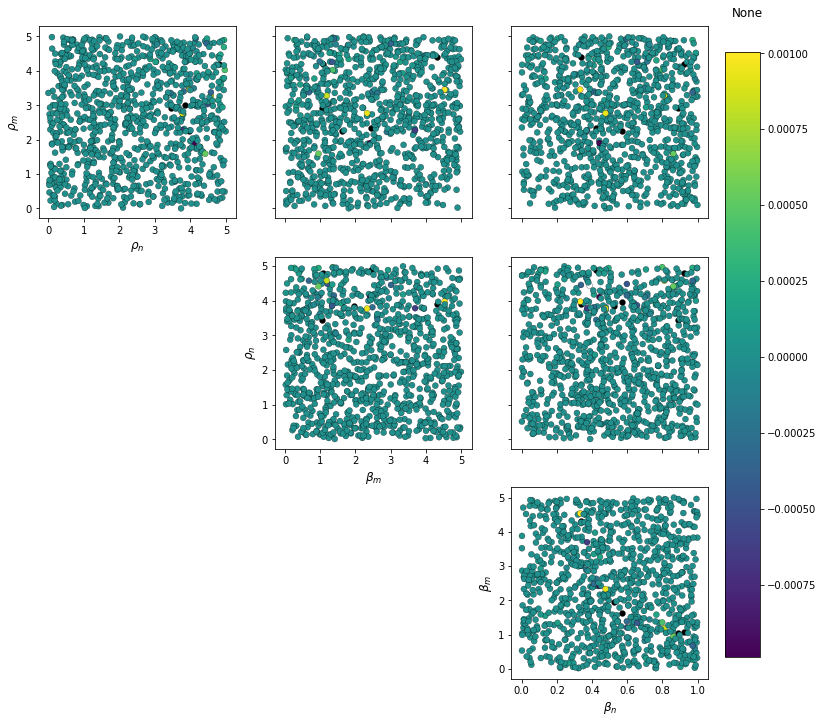

In [3]:
from dsn.util.plot_util import pairplot

labels = [r"$\rho_m$", r"$\rho_n$", r"$\beta_m$", r"$\beta_n$"]
                 
num_its = 500
params = np.stack([_rhom, _rhon, _betam, _betan], axis=1)
kappa1_diffs = kappa1s[:,:,:,:,num_its] - kappa1s[:,:,:,:,num_its-1]
kappa2_diffs = kappa2s[:,:,:,:,num_its] - kappa2s[:,:,:,:,num_its-1]
de1ta_0_diffs = delta_0s[:,:,:,:,num_its] - delta_0s[:,:,:,:,num_its-1]
z_diffs = zs[:,:,:,-1] - zs[:,:,:,-2]

inds = range(n)
#inds = np.logical_and(_betam < 0.2, _betan > 0.2)
#inds = np.logical_and(inds, np.logical_and(_rhom > 0.0, _rhon > 0.0))
#inds = np.logical_and(inds, _rhon < 2.0)
#inds = np.logical_and(inds, _betam > 0.0)
for i in range(2):
    for j in range(2):
        fig = pairplot(params[inds,:], range(4), c=kappa1_diffs[0,i,j,inds], labels=labels)

[2.0275055  1.64006926 3.9396447  4.84413287]


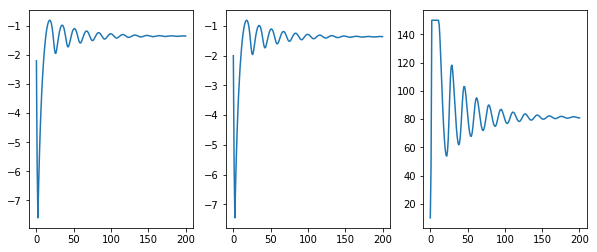

[4.76884991 2.8068057  4.30790633 0.24862491]


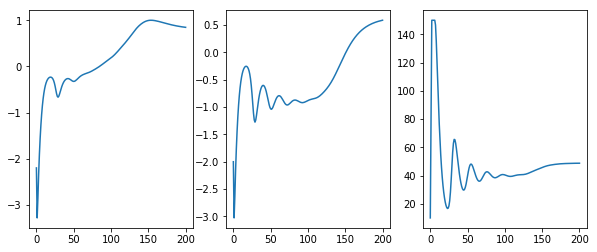

[1.13823939 0.32653997 4.89869651 4.43589597]


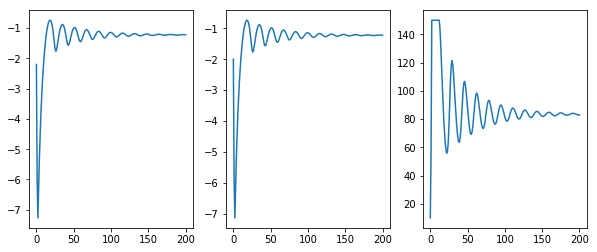

[4.90459577 2.54412688 4.37587706 4.82894273]


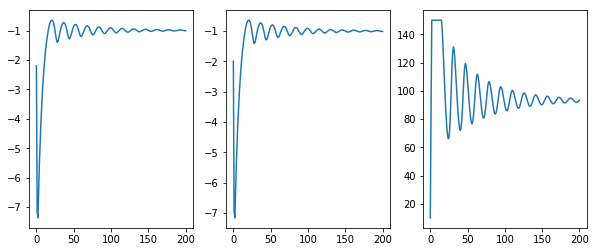

[2.71102154 4.68012621 0.54878514 1.40402161]


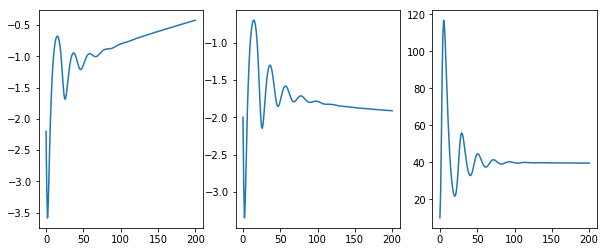

[0.22206367 4.63819369 4.96057509 4.78082641]


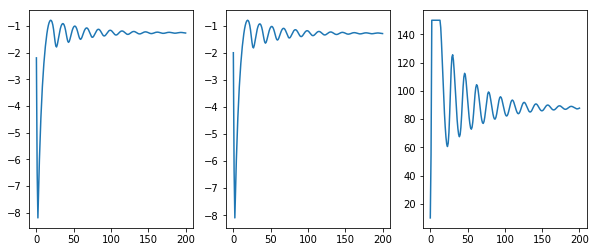

[3.09106075 3.61159048 0.09328434 4.53258962]


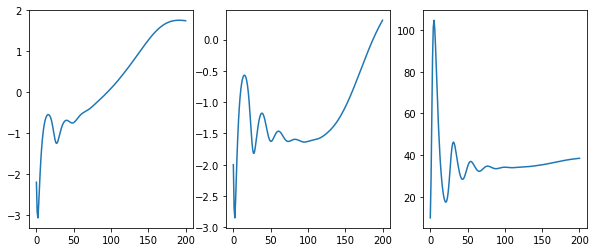

[4.74632774 3.7938298  1.55474868 0.39089825]


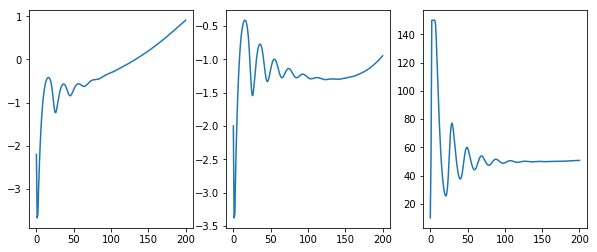

[1.70542155 3.80418308 4.73437676 4.02705312]


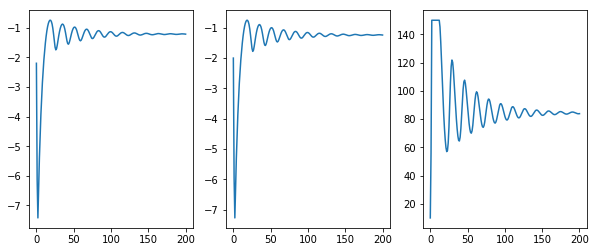

[1.26089688 3.76354297 4.64974357 4.67006391]


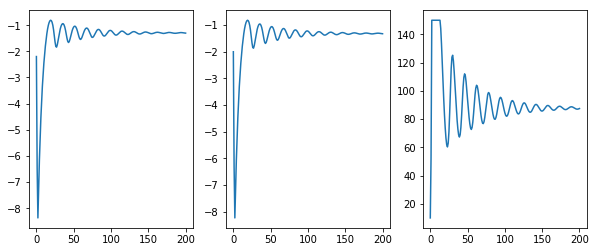

[2.32700808 4.07135544 0.45306074 0.6078872 ]


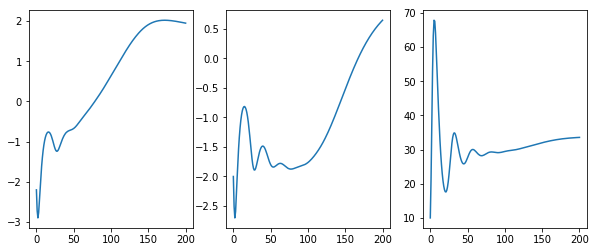

[4.48943649 1.68466158 4.46581034 4.23869438]


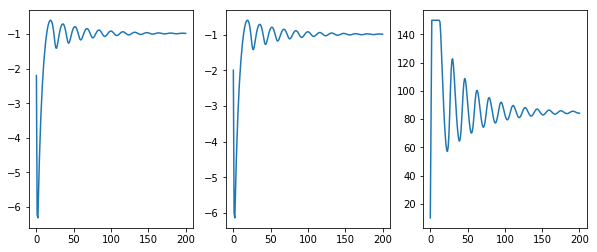

[2.90772876 3.96287319 0.71495003 0.98117009]


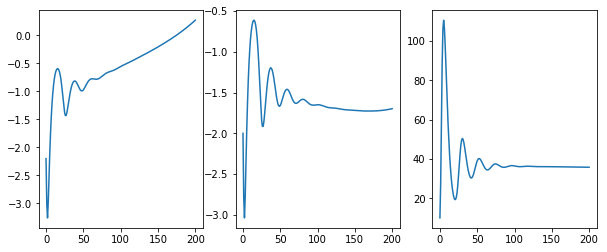

[3.54798732 3.42339233 0.12855652 3.50467135]


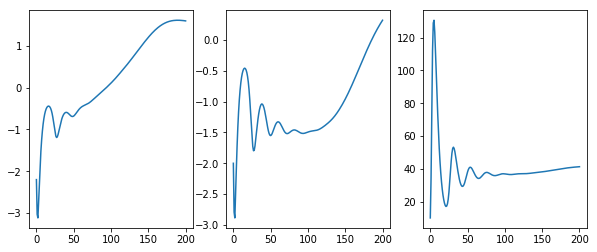

[2.95003135 4.42906929 0.09674602 2.29323129]


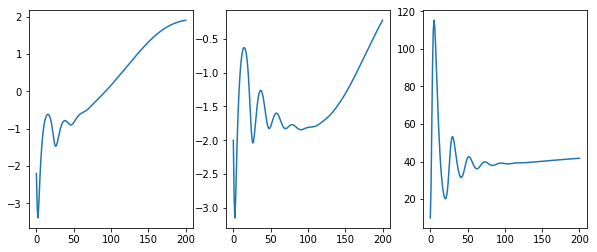

[4.24265764 3.95861014 3.42860865 4.77921411]


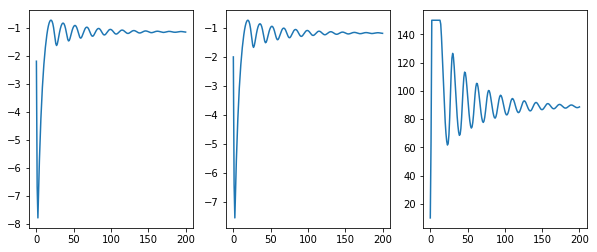

[4.56336115 4.86994626 2.44166041 4.83483801]


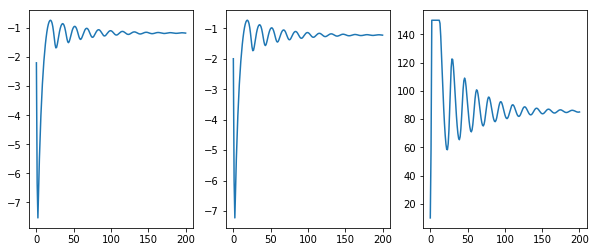

[4.68619361 3.14814788 0.21797315 4.28446684]


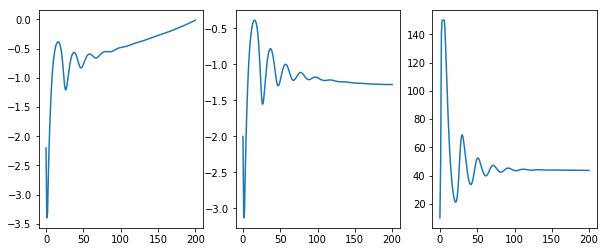

[2.15674642 4.07085384 4.64769439 4.41168793]


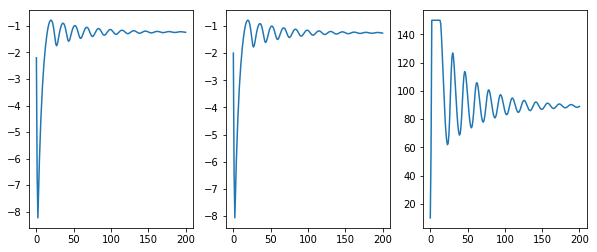

[0.9907475  3.94565254 4.84071638 4.85811178]


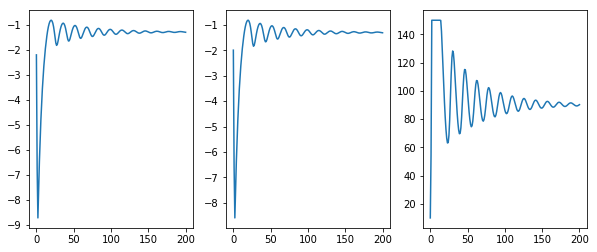

[3.51976777 1.50353668 4.06346999 4.73479836]


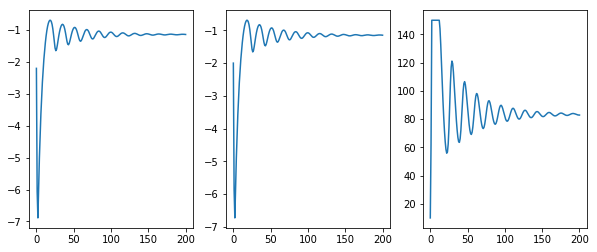

[3.95600472 3.93525563 0.53818092 1.39126946]


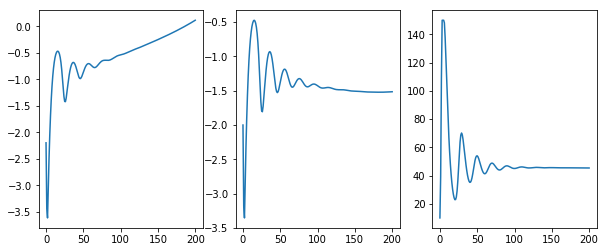

[2.53958802 2.23218689 4.89491177 4.37660897]


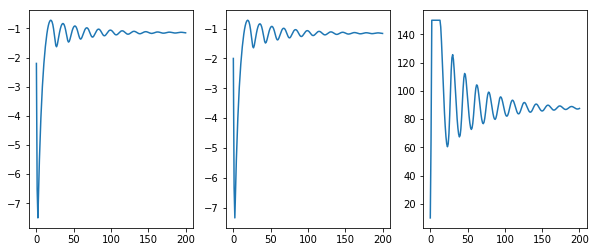

[3.87864285 1.96891158 4.52973233 4.29281402]


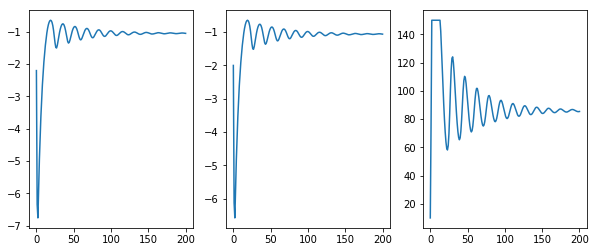

[4.60247645 4.88144085 0.10836274 1.25930171]


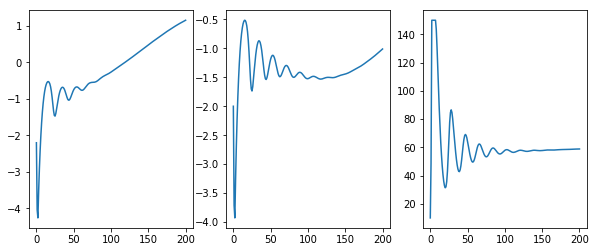

[3.36543596 4.64911518 3.9736228  3.57437916]


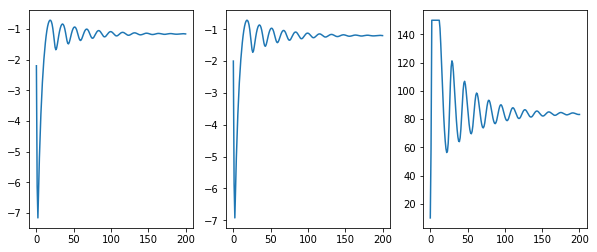

[3.52913093 4.88687909 1.90307979 0.28695726]


[4.03882825 4.65053687 3.48690039 4.52268051]


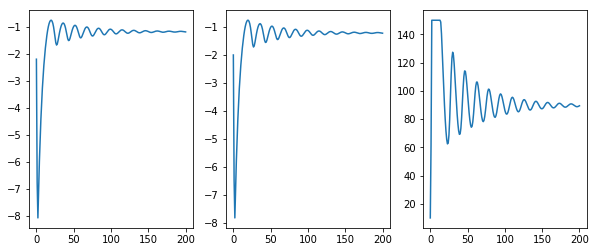

[2.59175738 4.36648356 0.14333503 2.08462426]


[2.34311338 4.83772608 3.77449313 4.91280858]


[4.70244473 3.64589312 1.61813188 0.66655024]


[3.64393768 4.83433965 2.78036582 0.3199392 ]


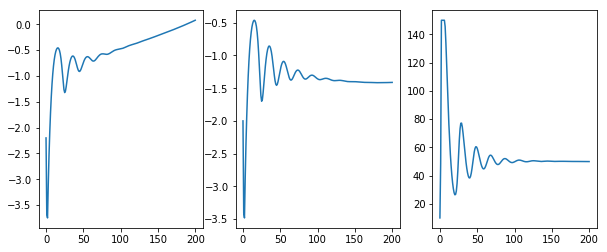

[3.27888256 3.04490248 0.20240222 2.40975963]


[0.47665272 2.93446583 4.93836974 4.96198309]


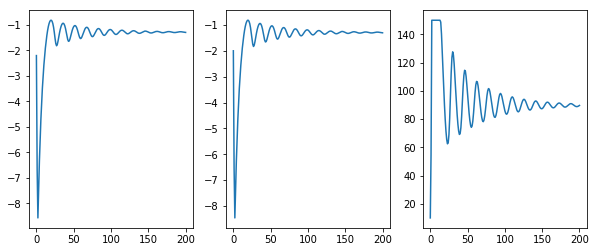

[2.42059463 4.48245083 3.46703527 4.520767  ]


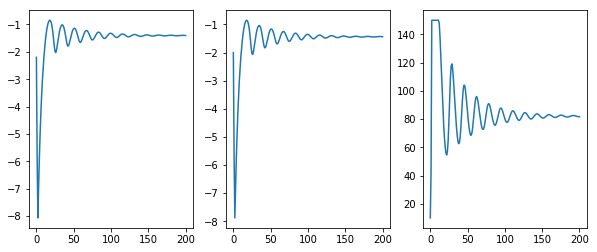

[3.60017371 2.02666707 3.79470739 4.75157967]


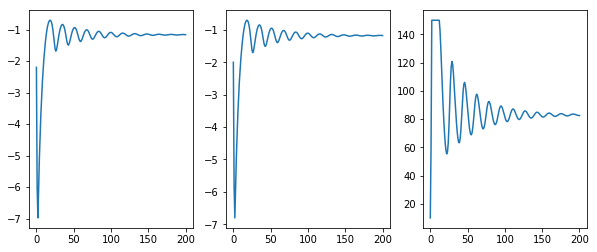

[2.77530514 3.49945408 4.2352497  3.95174759]


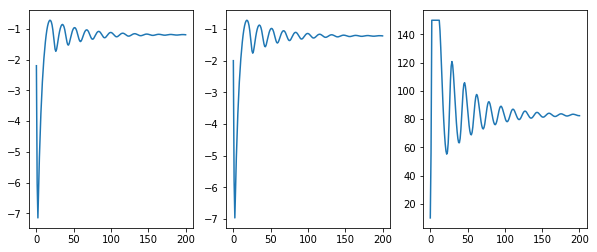

[2.50522712 4.44848491 4.70458278 4.07193601]


[3.98094194 4.67492304 0.42751883 1.21079234]


[4.44778132 0.24905502 4.41563537 4.78122355]


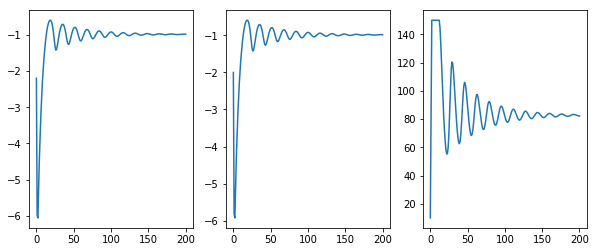

[2.99171071 0.44306789 4.41981812 4.83309592]


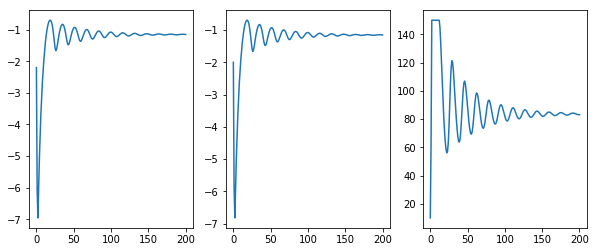

[4.778872   4.76431155 2.8726017  4.68880317]


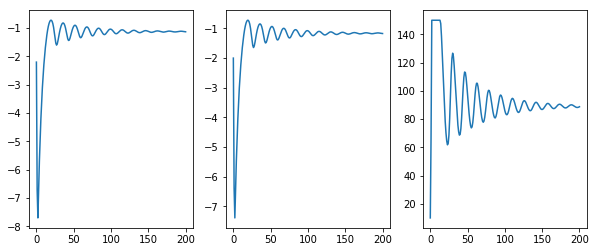

[4.50976831 4.42942534 3.03550183 4.64655124]


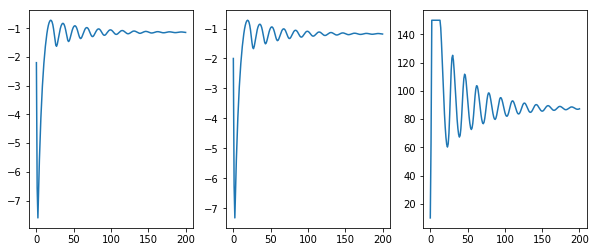

[2.51376135 3.67786052 0.1424012  4.38787522]


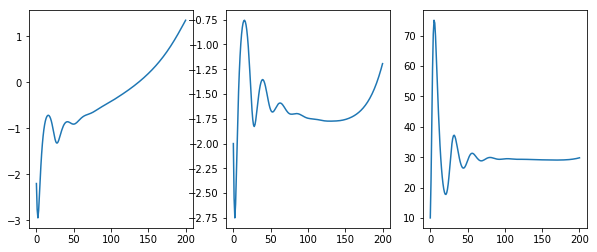

[1.36500365 4.48563694 4.10865188 4.89944701]


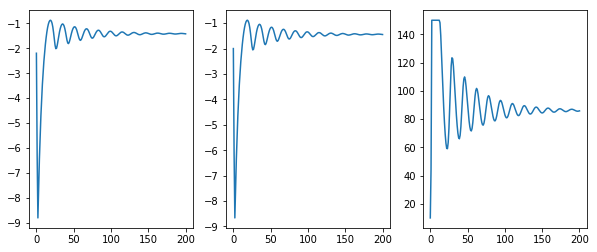

[4.80116612 4.92389172 4.27478422 3.05910251]


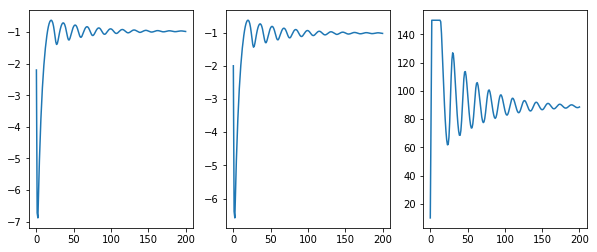

[4.92358883 4.97759058 2.62891766 4.9259328 ]


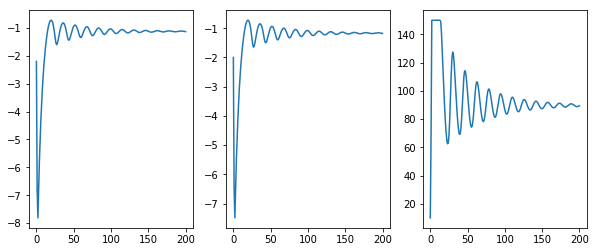

[3.77365729 4.36477127 4.50714307 0.15295951]


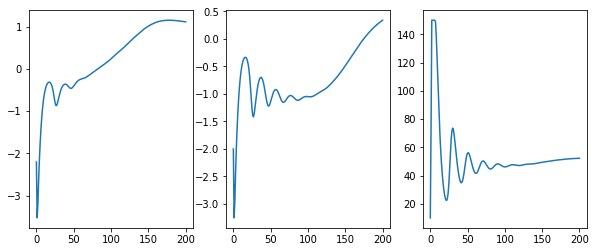

[4.52677353 4.95431974 1.7623782  0.25046515]


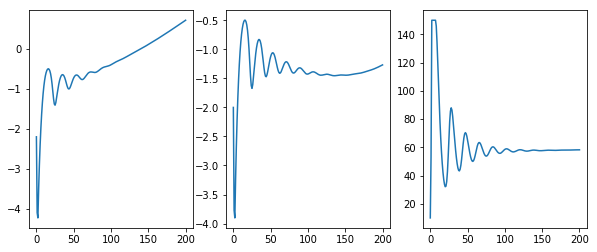

[3.12653058 2.68823301 4.8163568  3.6827155 ]


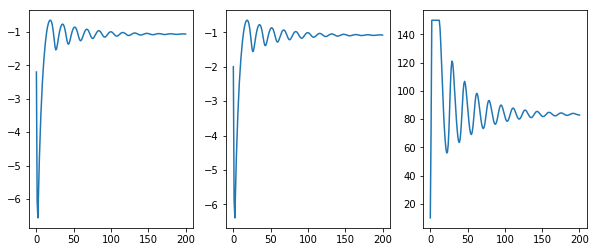

[0.12879005 3.31091914 4.38484807 4.75658638]


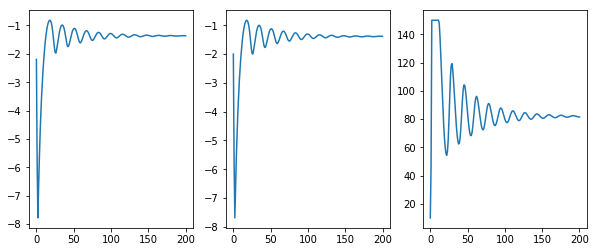

[4.81823785 4.45789644 1.15673963 0.42765065]


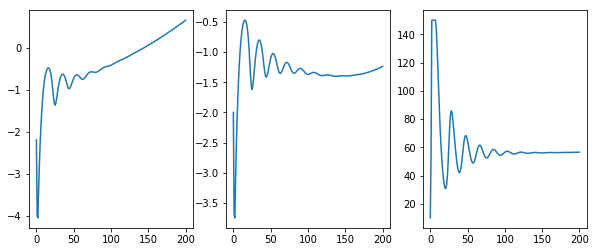

[1.96699932 1.60577857 4.65843142 4.19641347]


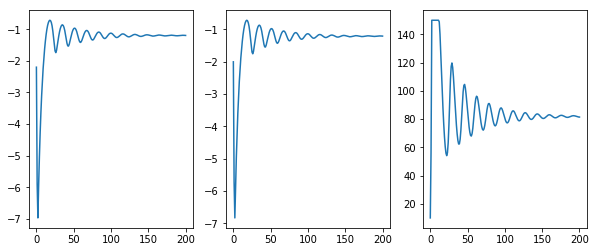

[2.5868528  4.03457372 1.93001831 0.15270822]


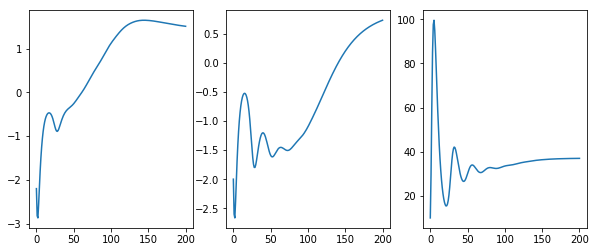

[3.12069454 3.81310772 4.07221783 4.52705436]


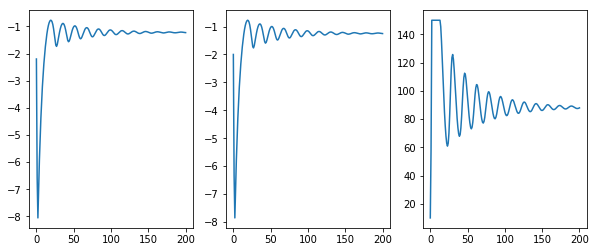

[4.75100482 4.50370652 0.61214641 0.13797685]


[0.15191509 2.89313461 4.70604303 4.51019262]


[2.45567096 4.7151107  2.19534231 0.16966452]


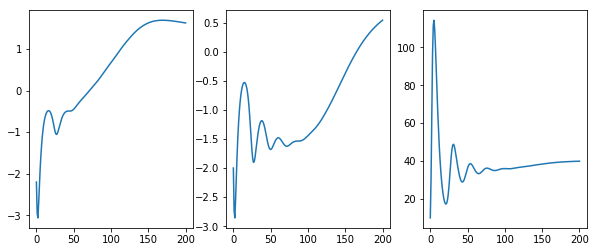

[3.7528721  3.64272626 2.01872074 0.33970079]


[1.6376744  4.48165428 4.69372788 4.38771127]


[3.82590189 3.68725063 2.36603814 0.23824838]


[3.52020359 4.20595159 3.88785602 4.70855457]


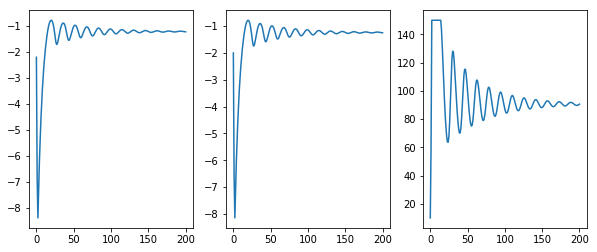

[4.39527664 2.98540458 2.47815369 0.3516012 ]


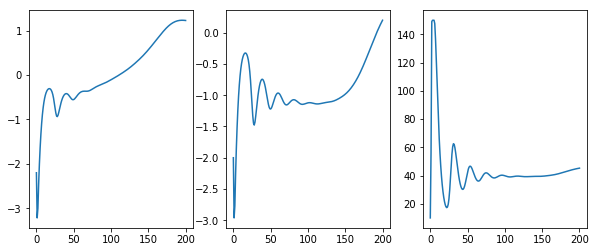

[4.75621601 4.34088258 1.89899307 0.48924094]


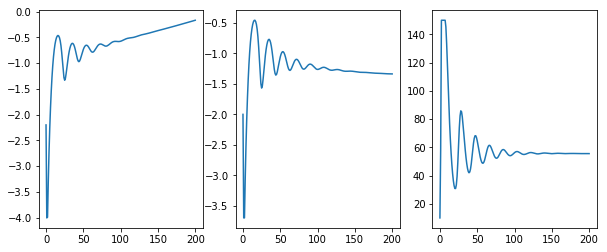

[1.49684386 4.83237127 0.18111485 1.94739543]


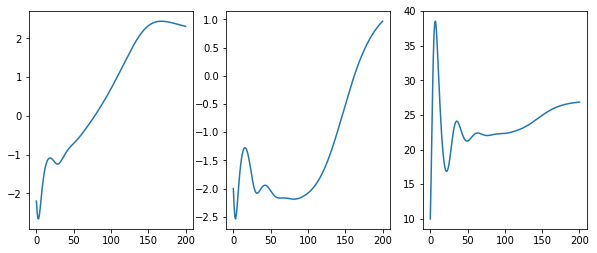

[4.12001982 4.49113527 4.74806236 2.91665301]


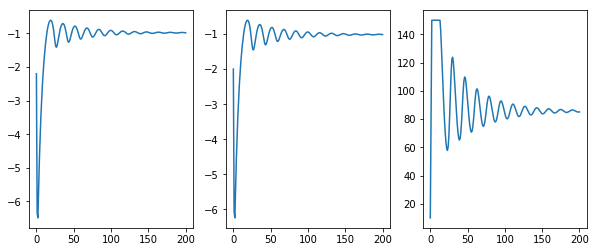

[1.15327827 4.71606775 4.95569183 3.94003846]


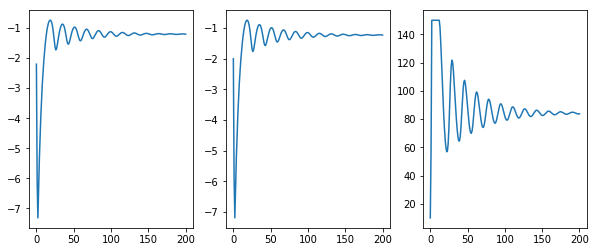

[1.12923367 3.3178637  4.48311088 4.28524882]


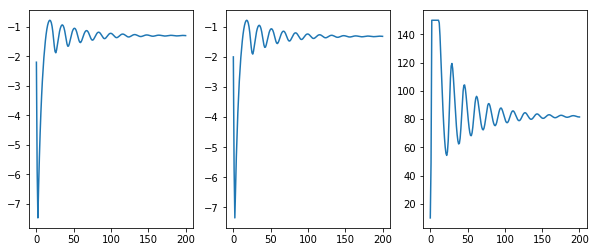

[4.16387498 4.09328861 0.10556627 4.65710946]


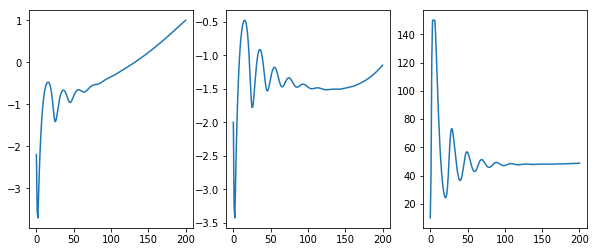

[4.49223331 4.42530352 0.37741376 2.4913637 ]


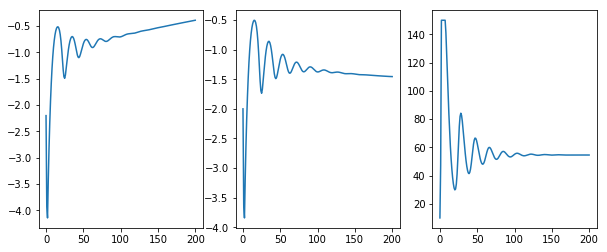

[2.76179668 4.4628851  0.19138164 1.89654544]


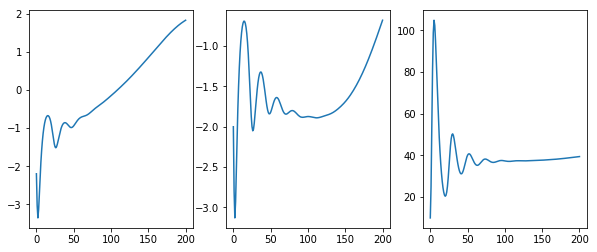

[3.59886311 4.16640673 3.73578466 0.12141703]


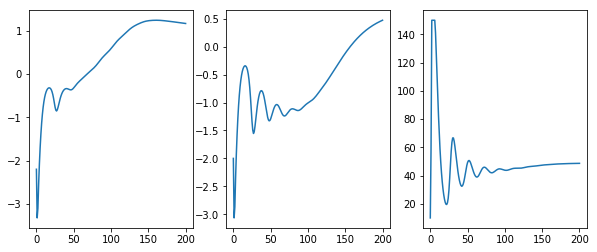

[4.84446742 3.16203762 4.52816639 4.32526974]


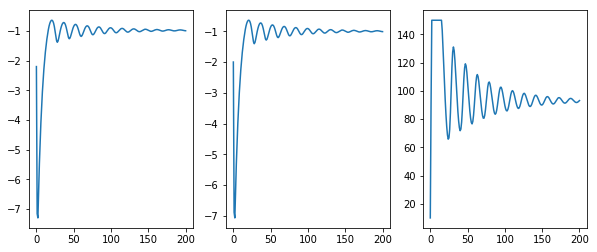

[4.42711834 3.02282928 0.91077115 0.86423841]


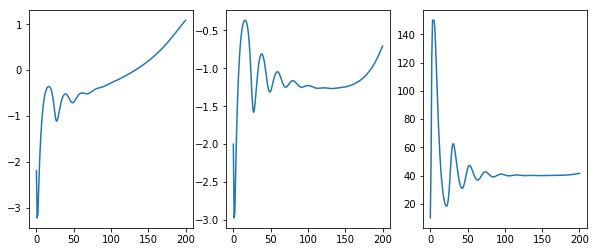

[4.45466955 3.12184292 4.35990848 3.89174287]


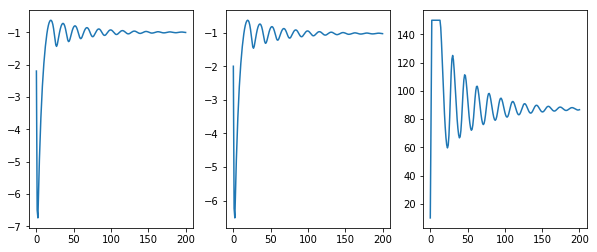

[2.85807457 4.55314303 0.21048143 0.87397412]


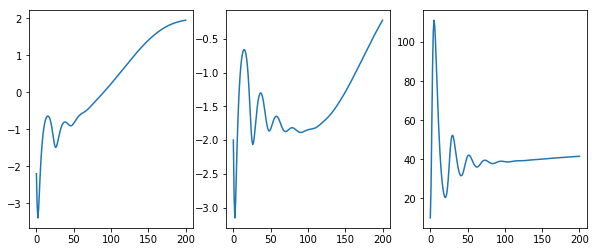

[1.51402922 4.80525383 0.78984263 0.92900212]


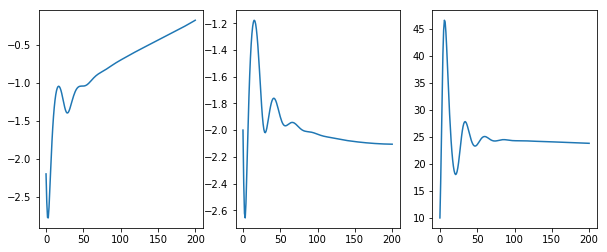

[2.31774316 3.96849968 4.48733052 4.19032814]


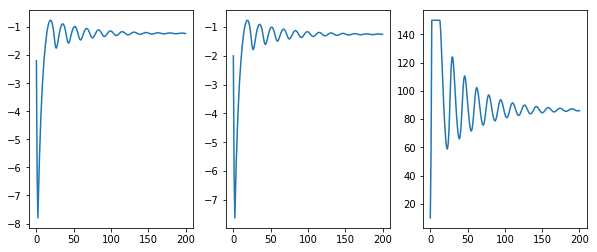

[2.42664567 3.2980789  0.46971352 0.82330065]


[4.0265487  4.07745684 3.07843612 0.19804102]


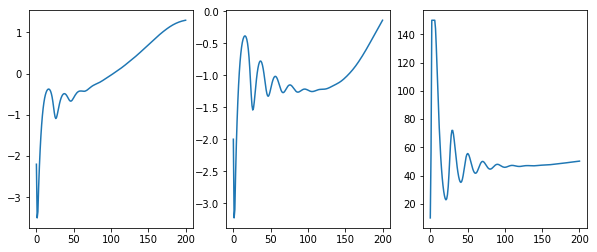

[1.35418031 2.01209321 4.00350369 4.796567  ]


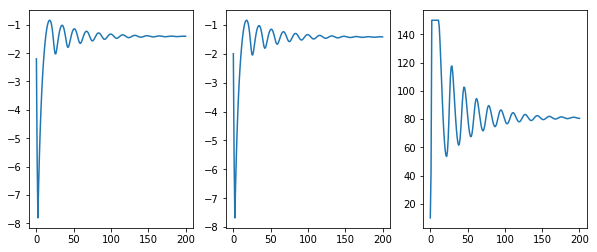

[3.98535806 3.89050237 4.11389479 3.42018545]


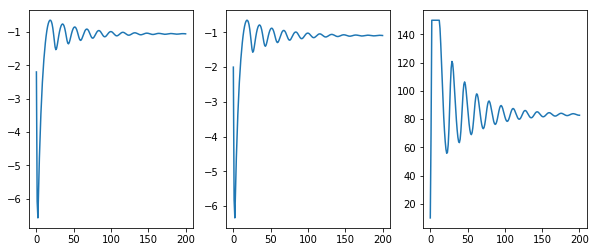

[4.67569645 4.01228515 4.53997717 3.33038871]


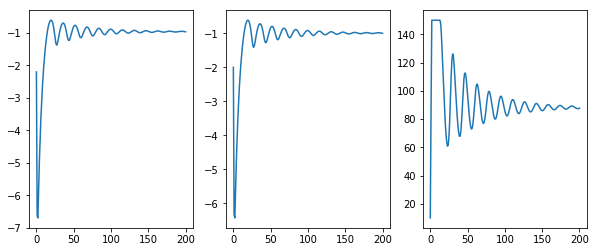

In [82]:
#beta_inds = np.logical_and(_betam > 0.0, _betan > 0.0)
plot_inds = np.abs(kappa1_diffs[0,1,1,:]) > 0.002
#plot_inds = np.logical_and(beta_inds, diff_inds)
eps_ind = 0
for n_i in range(1000):
    if plot_inds[n_i]:
        print(params[n_i])
        plt.figure(figsize=(10,4))
        plt.subplot(1,3,1)
        plt.plot(kappa1s[eps_ind,1,1,n_i,:])
        plt.subplot(1,3,2)
        plt.plot(kappa2s[eps_ind,1,1,n_i,:])
        plt.subplot(1,3,3)
        plt.plot(delta_0s[eps_ind,1,1,n_i,:])
        plt.show()
    

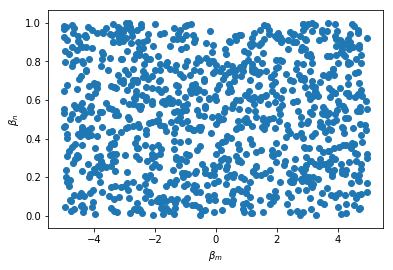

In [ ]:
plt.figure()
plt.scatter(_betam, _betan)
plt.xlabel(r'$\beta_m$')
plt.ylabel(r'$\beta_n$')
plt.show()

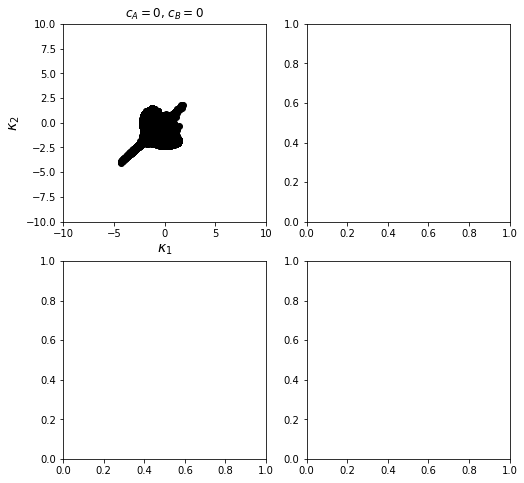

In [ ]:
colors = ['k', 'r', 'b', 'g']

labels = []
fontsize = 14
fig, axs = plt.subplots(2, 2, figsize=(8,8))
for i in range(num_cAs):
    cA = cAs[i]
    for j in range(num_cBs):
        cB = cBs[j]
        title = r'$c_A = %d$, $c_B = %d$' % (cA, cB)
        labels.append(title)
        axs[i,j].scatter(kappa1s[i,j], kappa2s[i,j], c=colors[2*i+j])
        axs[i,j].set_xlabel(r'$\kappa_1$', fontsize=fontsize)
        axs[i,j].set_ylabel(r'$\kappa_2$', fontsize=fontsize)
        axs[i,j].set_title(title)
        axs[i,j].set_xlim([-10,10])
        axs[i,j].set_ylim([-10, 10])
plt.show()

In [ ]:
plt.figure()
for i in range(num_cAs):
    cA = cAs[i]
    for j in range(num_cBs):
        cB = cBs[j]
        ind = 2*i + j
        plt.hist(zs[i,j,:], FaceColor=colors[ind], label=labels[ind])
plt.legend()
plt.show()

In [67]:
Zs = np.expand_dims(zs, 3)
print(Zs[0,0,:,:].shape)

(1000, 1)


In [68]:
Z = np.concatenate((Zs[0,0], Zs[0,1], Zs[1,0], Zs[1,1]), axis=1)

In [70]:
inds_low = np.logical_and(Z[:,0] < 0, Z[:,3] < 0)
inds_high = np.logical_and(Z[:,1] > 0, Z[:,2] > 0)
inds = np.logical_and(inds_low, inds_high)

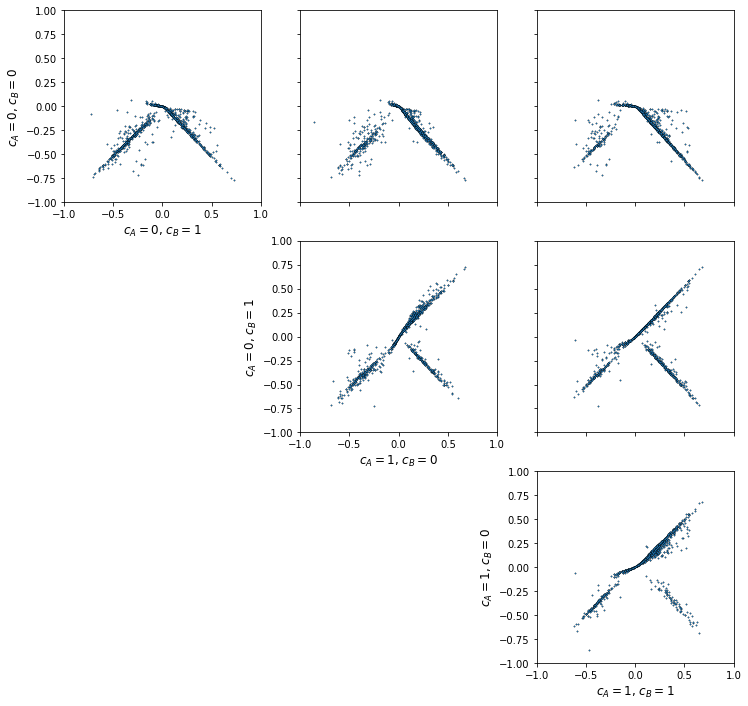

In [71]:
fig = pairplot(Z, range(4), labels, xlims=[-1, 1], ylims=[-1, 1])

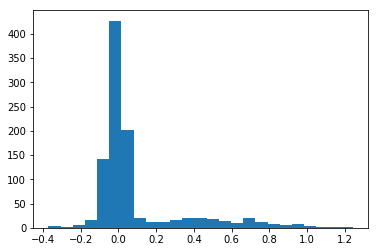

In [72]:
diffs = Zs[1,0] - Zs[0,1]
plt.figure()
plt.hist(diffs, 25)
plt.show()

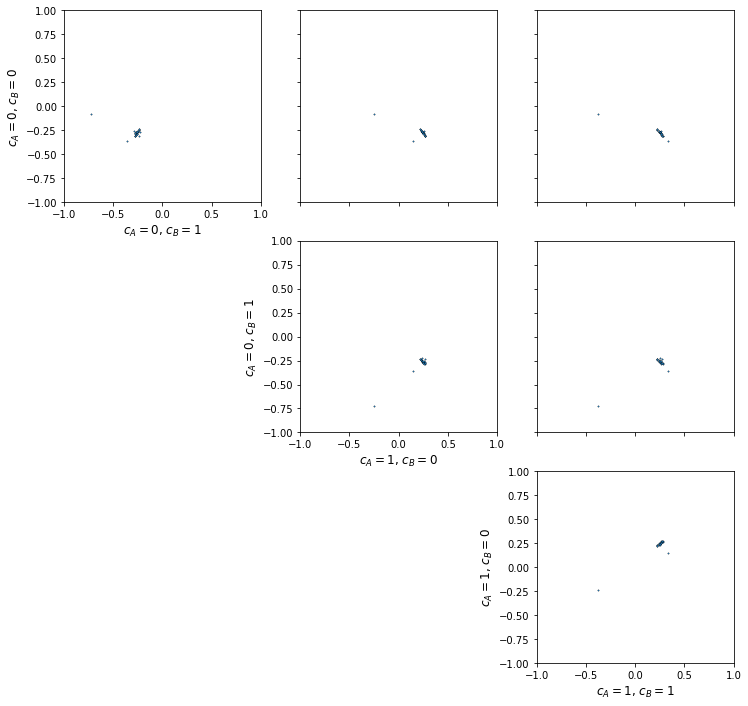

In [73]:

inds_low = diffs[:,0] > .45
inds_high = diffs[:,0] < .55
inds = np.logical_and(inds_low, inds_high)
fig = pairplot(Z[inds,:], range(4), labels, xlims=[-1, 1], ylims=[-1, 1])

(1000, 4)


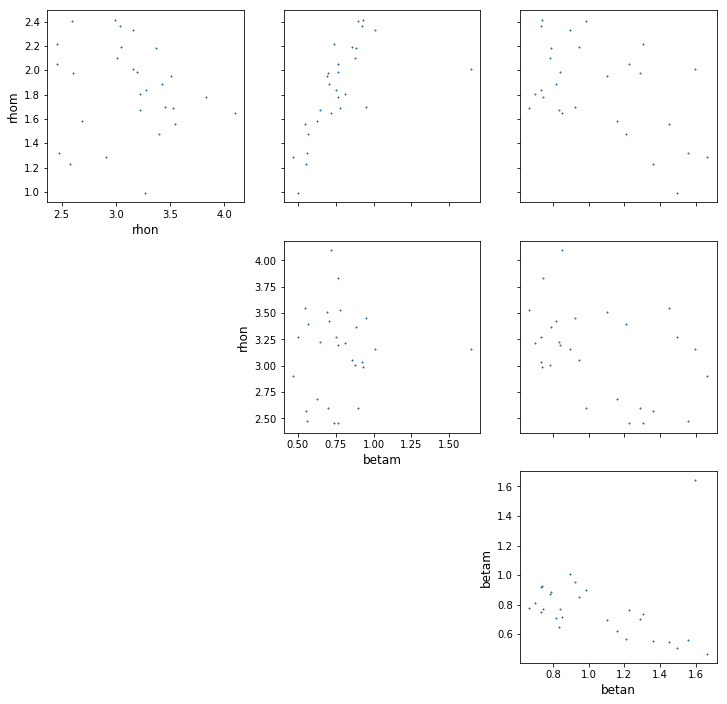

In [75]:
labels = ['rhom', 'rhon', 'betam', 'betan']
params = np.stack([_rhom, _rhon, _betam, _betan], axis=1)
print(params.shape)
fig = pairplot(params[inds,:], range(4), labels)

In [ ]:
rhom_xor = _rhom[inds]
rhon_xor = _rhon[inds]
betam_xor = _betam[inds]
betan_xor = _betan[inds]

print('rhom', rhom_xor)
print('rhon', rhon_xor)
print('betam', betam_xor)
print('betan', betan_xor)

In [ ]:
rhom [-0.3268798   2.5901365  -1.68711999 -0.38818384]
rhon [2.9713917  0.52257611 0.94958786 2.39911416]
betam [-1.92686328 -2.04672375 -2.25092573 -1.91615091]
betan [3.99441331 4.63058834 1.38784615 2.35561441]

(array([ 1.,  0.,  2.,  2.,  1.,  1.,  3.,  2.,  2.,  4.,  1.,  5.,  1.,
         5.,  6.,  5.,  4.,  6.,  6.,  8., 12.,  8.,  6.,  9., 10.,  8.,
        12., 16., 13., 13., 13., 22., 17., 19., 13., 25., 31., 24., 27.,
        27., 28., 21., 20., 31., 20., 28., 27., 19., 24., 30., 18., 21.,
        18., 24., 20., 19., 29., 20., 14., 25., 10., 11., 13., 13.,  8.,
        15.,  6.,  8.,  7.,  8.,  6.,  6.,  5.,  8.,  3.,  2.,  2.,  5.,
         2.,  3.,  1.,  0.,  1.,  1.,  1.,  0.,  3.,  0.,  1.,  0.,  1.,
         2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-8.58622864, -8.39416424, -8.20209985, -8.01003545, -7.81797106,
        -7.62590666, -7.43384227, -7.24177787, -7.04971348, -6.85764908,
        -6.66558469, -6.47352029, -6.2814559 , -6.0893915 , -5.89732711,
        -5.70526272, -5.51319832, -5.32113393, -5.12906953, -4.93700514,
        -4.74494074, -4.55287635, -4.36081195, -4.16874756, -3.97668316,
        -3.78461877, -3.59255437, -3.40048998, -3.20842558, -3.016361

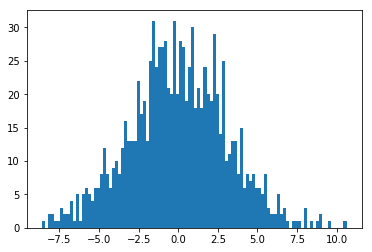

In [79]:
plt.hist(np.random.normal(0.0, 3.0, (1000)), 100)